In [15]:
from cgmbrush import *
import numpy as np
from scipy.ndimage.filters import convolve
import scipy.signal as sig


In [16]:

a = np.zeros((100, 100))
a[49][48] = 1
a[49][49] = 1
a[49][50] = 1
a[48][49] = 1
a[50][49] = 1

a_single_dot = np.zeros((30, 30))
a_single_dot[14][14] = 1

a_with_corner = np.zeros((30, 30))
a_with_corner[14][14] = 1
a_with_corner[14][15] = 1
a_with_corner[14][13] = 1
a_with_corner[15][14] = 1
a_with_corner[13][14] = 1
a_with_corner[1][0] = 1
a_with_corner[1][2] = 1
a_with_corner[1][1] = 1
a_with_corner[2][1] = 1
a_with_corner[0][1] = 1

b_even = np.zeros((10,10))
b_even[4][3] = 1
b_even[4][5] = 1
b_even[4][4] = 1
b_even[3][4] = 1
b_even[5][4] = 1

b_big = np.zeros((80,80))
b_big[39][39] = 1
b_big[40][39] = 1
b_big[38][39] = 1
b_big[39][40] = 1
b_big[39][38] = 1

b_odd = np.zeros((15,15))
b_odd[7][7] = 1
b_odd[7][8] = 1
b_odd[7][6] = 1
b_odd[8][7] = 1
b_odd[6][7] = 1

b_lumpy = np.zeros((20,20))
b_lumpy[11][10] = 0.1154235
b_lumpy[10][11] = 0.111363
b_lumpy[11][11] = 0.4854334

# Resolution 1 equivalent in cgmbrush
a_large = np.random.random((1024,1024))
b_random = np.random.random((20,20))

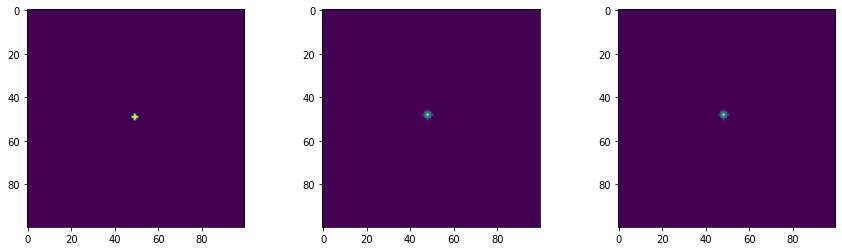

In [17]:
# Proof that my implementation is equivalent to what we did before for even sized filters
c8 = convolve(a, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

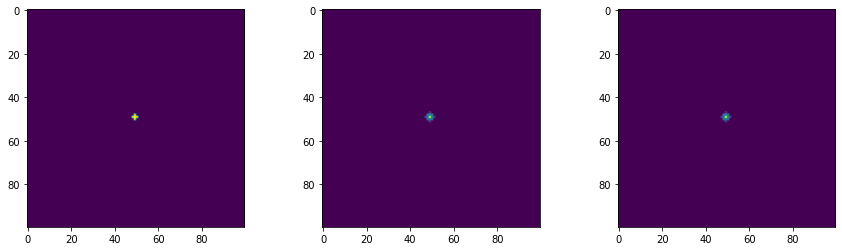

In [18]:
# Proof that my implementation is equivalent to what we did before for odd sized filters
c8 = convolve(a, b_odd, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_odd)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

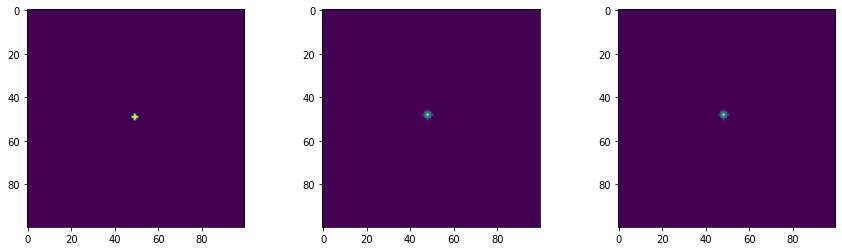

In [19]:
# Proof that my implementation is equivalent to what we did before for large masks
c8 = convolve(a, b_big, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b_big)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

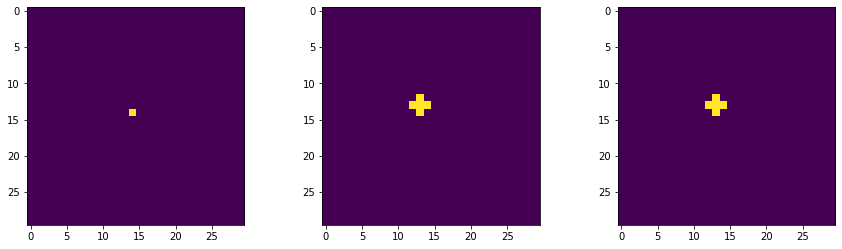

In [20]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_single_dot, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_single_dot, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_single_dot) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

assert (not np.allclose(np.zeros((30,30)), c3)), "should be false"

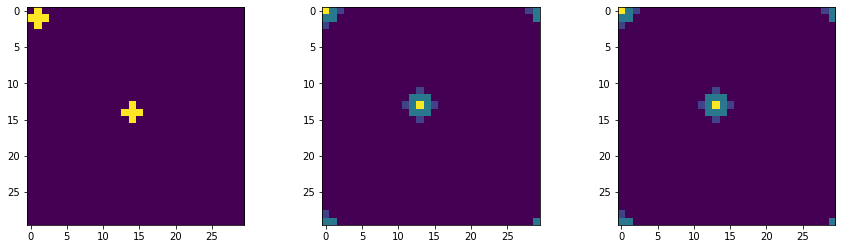

In [21]:
# Proof that my implementation is equivalent to what we did before when stuff is near the corner
c8 = convolve(a_with_corner, b_even, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_with_corner, b_even)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_with_corner) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

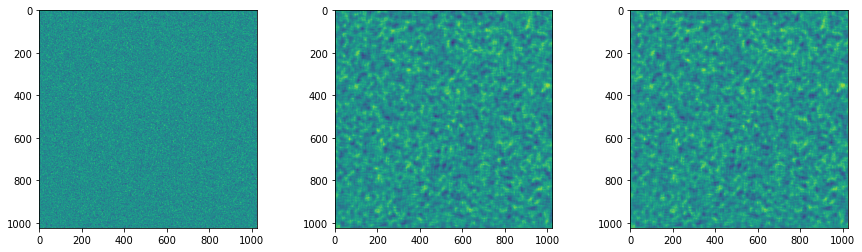

In [22]:
# Proof that my implementation is equivalent to what we did before when stuff both imputs are random values
c8 = convolve(a_large, b_random, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_random)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

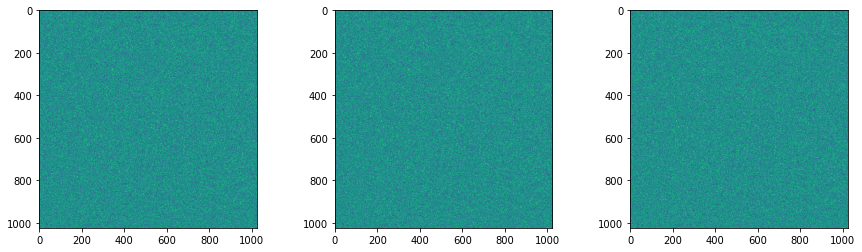

In [23]:
# Proof that my implementation is equivalent to what we did before for lumpy mask
c8 = convolve(a_large, b_lumpy, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a_large, b_lumpy)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,3,figsize=(15, 4))
axes[0].imshow(a_large) 
axes[1].imshow(c3) # hand written version
axes[2].imshow(c8) # old vesion, but periodic instead of symmetric

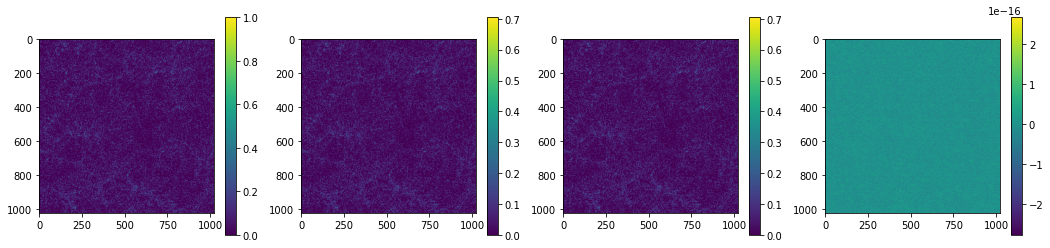

In [24]:
# Issue in real code
a = np.load('../var/problem halos.npy', allow_pickle=True)
b = np.load('../var/problem mask.npy', allow_pickle=True)
c8 = convolve(a, b, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b)
assert (np.allclose(c8, c3)), "test failed"

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

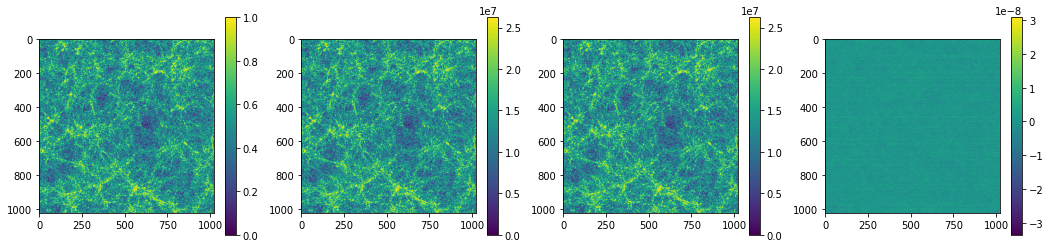

In [25]:
# Issue in real code, but the error is tiny...
a = np.load('../var/problem 2 halos.npy', allow_pickle=True)
b = np.load('../var/problem 2 mask.npy', allow_pickle=True)
#b = np.zeros((10,10))
#b[6][6] = 1
c8 = convolve(a, b, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b)

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

# Fails at 1e-08 level (default) absolute tolerance, but that's ok
assert (np.allclose(c8, c3, rtol=1e-05, atol=1e-07)), "test failed"



AssertionError: test failed

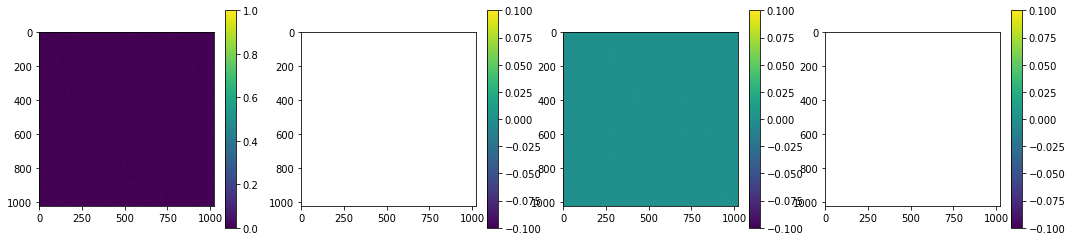

In [28]:
# Issue in real code, but the error is tiny...
a = np.load('../var/problem 3 halos.npy', allow_pickle=True)
b = np.load('../var/problem 3 mask.npy', allow_pickle=True)
#b = np.zeros((10,10))
#b[6][6] = 1
c8 = convolve(a, b, mode='wrap') # This is almost what we do today: just same method but using wrap instead of reflect
c3 = my_convolve(a, b)

fig, axes = plt.subplots(1,4,figsize=(18, 4))
pos = axes[0].imshow(a) 
fig.colorbar(pos, ax=axes[0])
pos = axes[1].imshow(c3) # hand written version
fig.colorbar(pos, ax=axes[1])
pos = axes[2].imshow(c8) # old vesion, but periodic instead of symmetric
fig.colorbar(pos, ax=axes[2])
pos = axes[3].imshow(c8 - c3) # delta between them
fig.colorbar(pos, ax=axes[3])

# Fails at 1e-08 level (default) absolute tolerance, but that's ok
#assert (np.allclose(c8, c3, rtol=1e-07, atol=1e-01)), "test failed"



In [27]:
#min_mass = 10**10
#max_mass = 10**14.5
#log_bins = 30
#config = Configuration('tophat_spherical', 1, resolution=1, file_prefix='STH', load_from_files=False)
#config.provider = BolshoiProvider()
#
#config.results = hist_profile(config.provider, config.den_grid_size, config.RS_array, min_mass, 
#                                    max_mass, log_bins, config.subtraction_halo_profile, 
#                                    config.addition_halo_profile, config.scaling_radius, config.resolution)
#
#original = config.provider.get_density_field(0, config.den_grid_size)
#background_dm = config.results[5][0]
#cgm_only = config.results[4][0]
#density_final = config.results[1][0]
#
#fig, axes = plt.subplots(1,4,figsize=(18, 4))
#pos = axes[0].imshow(original) 
#fig.colorbar(pos, ax=axes[0])
#axes[0].title.set_text('Original Density Field')
#pos = axes[1].imshow(background_dm) 
#fig.colorbar(pos, ax=axes[1])
#axes[1].title.set_text('Density minus halos')
#pos = axes[2].imshow(cgm_only) 
#fig.colorbar(pos, ax=axes[2])
#axes[2].title.set_text('CGM Profile to add')
#pos = axes[3].imshow(density_final) 
#fig.colorbar(pos, ax=axes[3])
#axes[3].title.set_text('Final Product')

# Visual sanity test, no assertions
